In [65]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
dataset=pd.read_csv('data.csv')

In [67]:
dataset

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [68]:
dataset.drop(['id'], axis='columns', inplace=True)
dataset.drop(['perimeter_mean', 'perimeter_se', 'perimeter_worst'], axis='columns', inplace=True)
dataset.drop(['Radius_mean', 'radius_se', 'radius_worst'], axis='columns', inplace=True)
dataset.drop(['symmetry_se','texture_se','smoothness_se','fractal_dimension_se'], axis='columns', inplace=True)
dataset.drop('fractal_dimension_mean',axis='columns', inplace=True)
dataset.drop('Texture_mean',axis='columns', inplace=True)
dataset.drop(['area_mean','compactness_worst'],axis='columns', inplace=True)

In [69]:
dataset['diagnosis'] = dataset['diagnosis'].map({'M': 1, 'B': 0})

In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   smoothness_mean          569 non-null    float64
 2   compactness_mean         569 non-null    float64
 3   concavity_mean           569 non-null    float64
 4   concave points_mean      569 non-null    float64
 5   symmetry_mean            569 non-null    float64
 6   area_se                  569 non-null    float64
 7   compactness_se           569 non-null    float64
 8   concavity_se             569 non-null    float64
 9   concave points_se        569 non-null    float64
 10  texture_worst            569 non-null    float64
 11  area_worst               569 non-null    float64
 12  smoothness_worst         569 non-null    float64
 13  concavity_worst          569 non-null    float64
 14  concave points_worst     5

In [71]:
scaler = MinMaxScaler()
X = dataset.drop('diagnosis', axis=1)
X = scaler.fit_transform(X)
y = dataset['diagnosis']

In [72]:
dataset

,diagnosis,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,area_se,compactness_se,concavity_se,concave points_se,texture_worst,area_worst,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.11840,0.27760,0.30010,0.14710,0.2419,153.40,0.04904,0.05373,0.01587,17.33,2019.0,0.16220,0.7119,0.2654,0.4601,0.11890
1,1,0.08474,0.07864,0.08690,0.07017,0.1812,74.08,0.01308,0.01860,0.01340,23.41,1956.0,0.12380,0.2416,0.1860,0.2750,0.08902
2,1,0.10960,0.15990,0.19740,0.12790,0.2069,94.03,0.04006,0.03832,0.02058,25.53,1709.0,0.14440,0.4504,0.2430,0.3613,0.08758
3,1,0.14250,0.28390,0.24140,0.10520,0.2597,27.23,0.07458,0.05661,0.01867,26.50,567.7,0.20980,0.6869,0.2575,0.6638,0.17300
4,1,0.10030,0.13280,0.19800,0.10430,0.1809,94.44,0.02461,0.05688,0.01885,16.67,1575.0,0.13740,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.11100,0.11590,0.24390,0.13890,0.1726,158.70,0.02891,0.05198,0.02454,26.40,2027.0,0.14100,0.4107,0.2216,0.2060,0.07115
565,1,0.09780,0.10340,0.14400,0.09791,0.1752,99.04,0.02423,0.03950,0.01678,38.25,1731.0,0.11660,0.3215,0.1628,0.2572,0.06637
566,1,0.08455,0.10230,0.09251,0.05302,0.1590,48.55,0.03731,0.04730,0.01557,34.12,1124.0,0.11390,0.3403,0.1418,0.2218,0.07820
567,1,0.11780,0.27700,0.35140,0.15200,0.2397,86.22,0.06158,0.07117,0.01664,39.42,1821.0,0.16500,0.9387,0.2650,0.4087,0.12400


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [74]:
model = SVC(kernel='rbf', C=1.0)
model.fit(X_train, y_train)

SVC()

In [75]:
train_score = model.score(X_train, y_train)*100
print("Training score:", train_score)

test_score = model.score(X_test, y_test)*100
print("Testing score:", test_score)

Training score: 97.41784037558685
Testing score: 97.9020979020979


Accuracy: 97.9020979020979


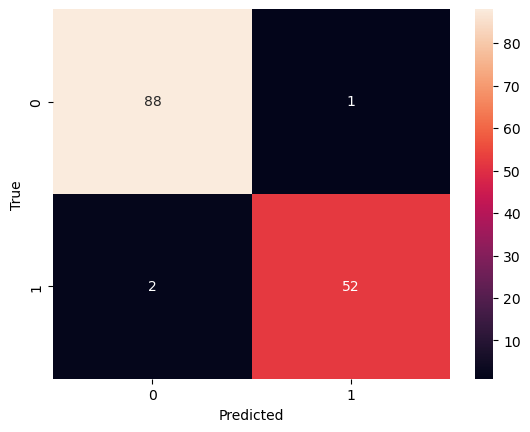

In [76]:
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()